***Objective***

1) In the Below analysis, we are going to investigate, weather there is a statistical significance evidence available about the features 
to conclude that they have significant impact on the Attrition Levels.


2) Identifying the correct features impacting attrition can help us to do further segment / deep analysis to find out the areas with problem.

3) We can use more appropriate features to build our ML Models.

In [ ]:
import pandas as pd

In [121]:
df = pd.read_csv(r'C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\HR_comma_sep_LogisticRegression_BinaryClassification.csv')

In [122]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [123]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [124]:
df1 = df[['salary','left']]
df1.shape

(14999, 2)

In [125]:
df2 = df[['satisfaction_level', 'left']]
df2.shape

(14999, 2)

In [126]:
df3 = df[['average_montly_hours', 'left']]
df3.shape

(14999, 2)

In [127]:
df4 = df[['promotion_last_5years', 'left']]
df4.shape

(14999, 2)

In [128]:
df5 = df[['promotion_last_5years','average_montly_hours','satisfaction_level', 'left']]
df5.head()


,promotion_last_5years,average_montly_hours,satisfaction_level,left
0,0,157,0.38,1
1,0,262,0.80,1
2,0,272,0.11,1
3,0,223,0.72,1
4,0,159,0.37,1


In [129]:
df6 = df[['Department','promotion_last_5years','satisfaction_level', 'left']]
df6.head()

,Department,promotion_last_5years,satisfaction_level,left
0,sales,0,0.38,1
1,sales,0,0.80,1
2,sales,0,0.11,1
3,sales,0,0.72,1
4,sales,0,0.37,1


***Salary Vs Attrition (Chi-Square Test)***

As salary and attrition values can be considered as categorical variables, I have used Chi Square test, as this gives if there is a stastically significant relationship between the two variables.


1) Null Hypothesis (Ho) = There is no association between Salary and Attrition. The distribution of Salary categories (High, Medium, Low) is the same for employees who left (Attrition = 0) and employees who stayed (Attrition = 1).

2) Alternative Hypothesis (H1) = There is an association between Salary and Attrition. The distribution of Salary categories is different for employees who left (Attrition = 0) and employees who stayed (Attrition = 1).

In [131]:

df1 = df[['salary','left']]
contingency_table = pd.crosstab(df['salary'], df['left'])
contingency_table = pd.DataFrame(contingency_table)
contingency_table

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [132]:
contingency_table = pd.crosstab(df['salary'], df1['left'])
contingency_table

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [133]:
import pandas as pd
from scipy.stats import chi2_contingency

P-values always range from 0 to 1

small p value (<0.05) indicate strong evidence against null hypothesis

large p value (>0.05) indicates insufficient evidence to reject the null hypothesis

In [135]:
import pandas as pd
from scipy.stats import chi2_contingency

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis: There is a statistically significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant association between the variables.")

p-value: 1.652086749295958e-83
Reject the null hypothesis: There is a statistically significant association between the variables.


***Conclusion: There is a relationship between the Salary & Attrition***

***Satisfaction Vs Attrition***

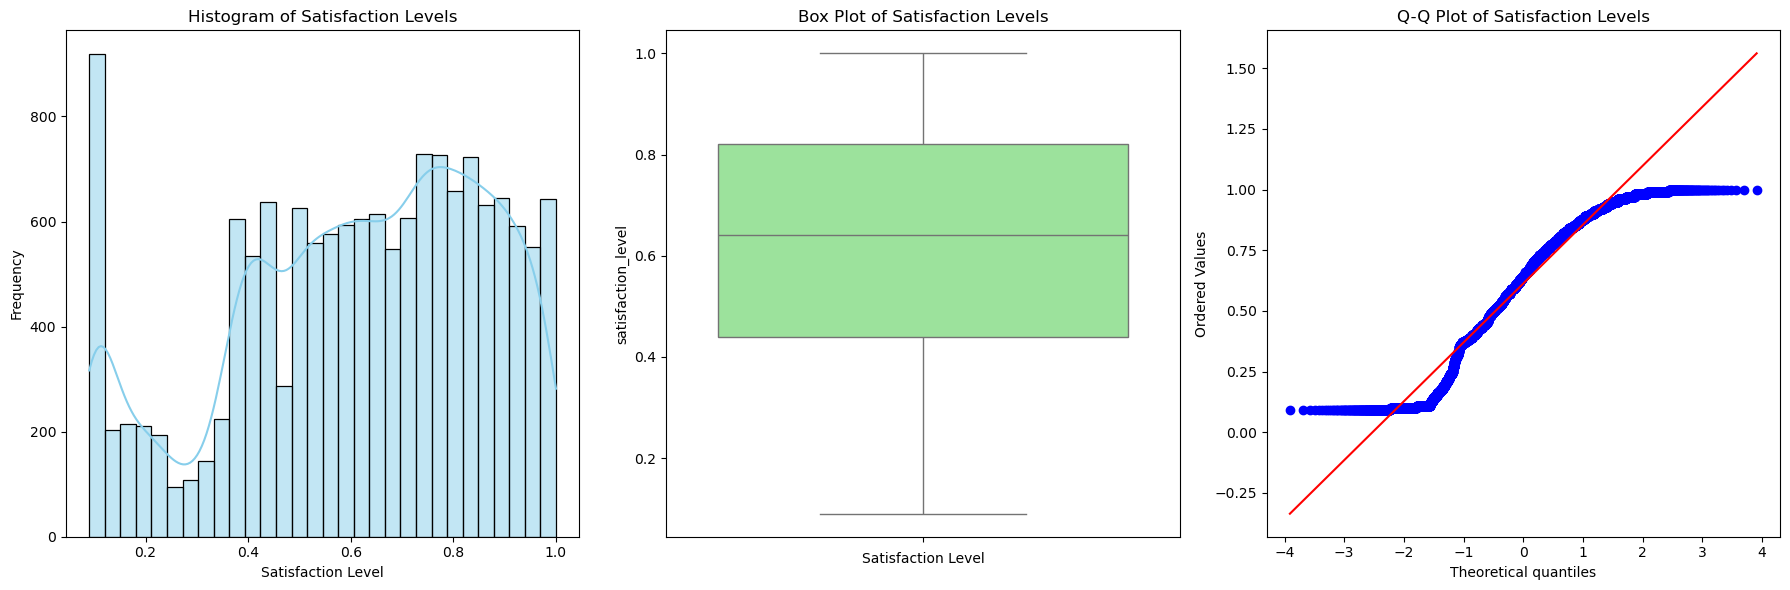

Shapiro-Wilk Test Statistic: 0.9518945472678346, p-value: 3.1637031058241156e-56
Skewness: -0.47631270075042725, Kurtosis: -0.6710350084807528


C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14999.
  res = hypotest_fun_out(*samples, **kwds)


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram with KDE
sns.histplot(df2['satisfaction_level'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Histogram of Satisfaction Levels')
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=df2['satisfaction_level'], ax=axes[1], color="lightgreen")
axes[1].set_title('Box Plot of Satisfaction Levels')
axes[1].set_xlabel('Satisfaction Level')

# Q-Q Plot
stats.probplot(df2['satisfaction_level'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Satisfaction Levels')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = stats.shapiro(df2['satisfaction_level'])
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Skewness and Kurtosis
skewness = stats.skew(df2['satisfaction_level'])
kurtosis = stats.kurtosis(df2['satisfaction_level'])
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')


The data is not normally distributed, hence, we are using the Mann-Whitney U test instead of the T test.

***Satisfaction Vs Attrition (Mann - Whitney U test)***

1) Null Hypothesis (H₀): The distributions of satisfaction levels are the same for employees who stay and employees who leave.

2) Alternative Hypothesis (H₁): The distributions of satisfaction levels are different for employees who stay and employees who leave.

In [141]:
from scipy import stats
df2.head()


satisfaction_retained = df2[df2['left']==0]['satisfaction_level']
satisfaction_retained

satisfaction_left = df2[df2['left']==1]['satisfaction_level']
satisfaction_left


0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 3571, dtype: float64

In [142]:
# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(satisfaction_retained, satisfaction_left)

# Output the results
print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'p-value: {p_value}')

if p < 0.05:
    print("Reject the null hypothesis: There is a statistically significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant association between the variables.")

Mann-Whitney U statistic: 30522915.0
p-value: 0.0
Reject the null hypothesis: There is a statistically significant association between the variables.


***Conclusion: There is Significant Difference of Satisfaction Levels among retained and left groups***

***Working Hours Vs Attrition (Mann - Whitney U test)***

1) Null Hypothesis (H₀): There is no significant difference in the average working hours between employees who stay with the company and employees who leave the company.

2) Alternative Hypothesis (H₁): There is a significant difference in the average working hours between employees who stay with the company and employees who leave the company.

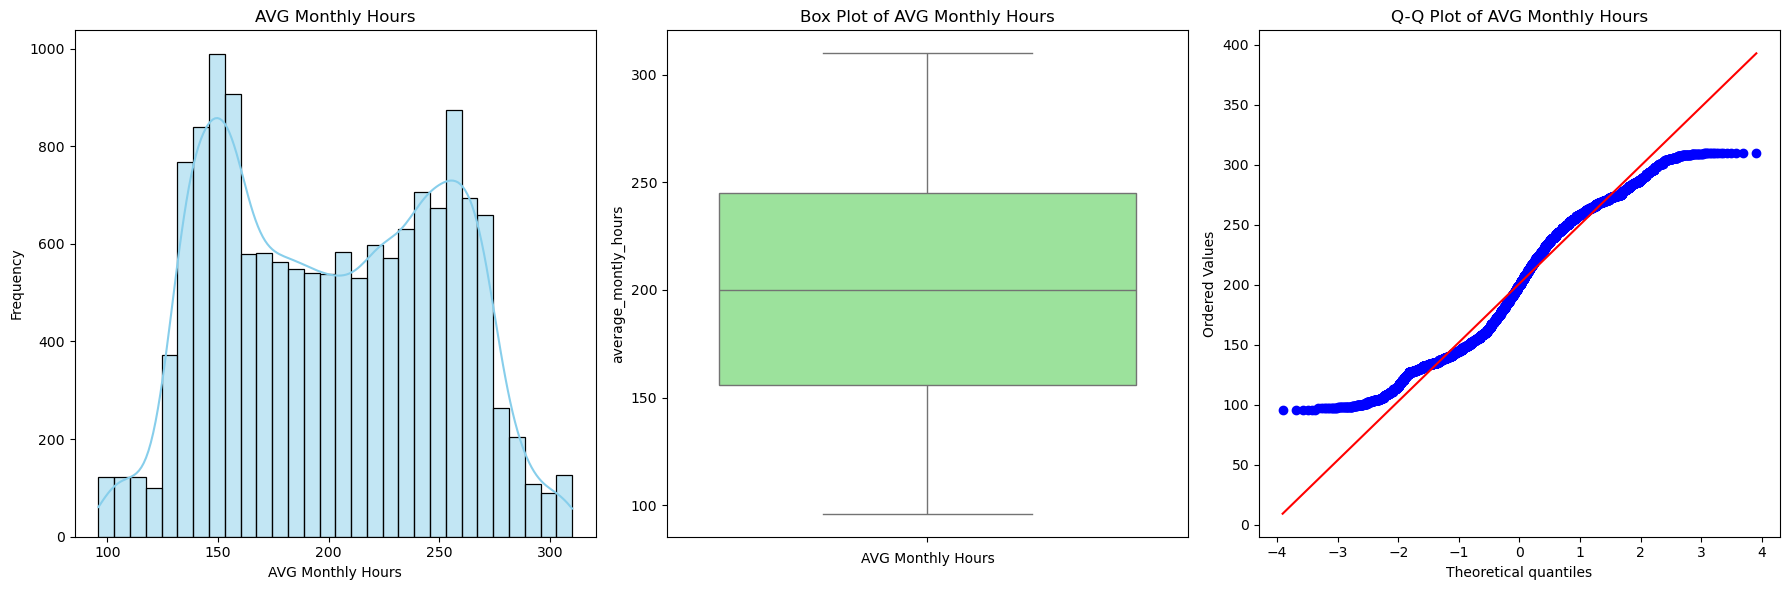

Shapiro-Wilk Test Statistic: 0.9633654336916019, p-value: 2.784782234181442e-51
Skewness: 0.05283670471826943, Kurtosis: -1.1350032510931285


C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14999.
  res = hypotest_fun_out(*samples, **kwds)


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df3 = df[['average_montly_hours', 'left']]
df3.shape

x = df3['average_montly_hours']

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram with KDE
sns.histplot(x, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('AVG Monthly Hours')
axes[0].set_xlabel('AVG Monthly Hours')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x, ax=axes[1], color="lightgreen")
axes[1].set_title('Box Plot of AVG Monthly Hours')
axes[1].set_xlabel('AVG Monthly Hours')

# Q-Q Plot
stats.probplot(x, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of AVG Monthly Hours')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_p = stats.shapiro(x)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Skewness and Kurtosis
skewness = stats.skew(x)
kurtosis = stats.kurtosis(x)
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')


In [146]:
from scipy import stats
df2.head()
average_montly_hours_retained = df3[df3['left']==0]['average_montly_hours']
average_montly_hours_retained
average_montly_hours_left = df3[df3['left']==1]['average_montly_hours']
average_montly_hours_left

0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 3571, dtype: int64

In [147]:
# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(average_montly_hours_retained, average_montly_hours_left)

# Output the results
print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'p-value: {p_value}')


if p < 0.05:
    print("Reject the null hypothesis: There is a statistically significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant association between the variables.")

Mann-Whitney U statistic: 19119787.5
p-value: 1.2769565984354332e-08
Reject the null hypothesis: There is a statistically significant association between the variables.


***Conclusion: There is a relationship b/w attrition and working hours***

***Promotion in Last 5 Years Vs Attrition (Chi-Square Test)***

***Hypothesis***

Null Hypothesis (H₀): There is no relationship between promotion status and attrition. In other words, promotion status does not affect the likelihood of an employee leaving.

Alternative Hypothesis (H₁): There is a significant relationship between promotion status and attrition. In other words, promotion status does influence the likelihood of an employee leaving.

In [151]:
df4 = df[['promotion_last_5years', 'left']]
print(df4.groupby('promotion_last_5years').size())
print(df4.groupby('left').size())

promotion_last_5years
0    12849
1     2150
dtype: int64
left
0    11428
1     3571
dtype: int64


In [152]:
contingency_table = pd.crosstab(df4['promotion_last_5years'], df4['left'])
contingency_table.head()

left,0,1
promotion_last_5years,,
0,9282,3567
1,2146,4


In [153]:
import pandas as pd
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_contingency

print(f'p value', p)

if p < 0.05:
    print("Reject the null hypothesis: Hence, There statistical evidence about the relationship of promotion status and attrition.")
else:
    print("Fail to reject the null hypothesis: Hence, There no statistical evidence about the relationship of promotion status and attrition.")

p value 1.388902433642264e-169
Reject the null hypothesis: Hence, There statistical evidence about the relationship of promotion status and attrition.


From above chart, we can see top factor is Satisfaction level & promotion & no correlation between the monthly hours and attrition.

***Based on Correlation map, I feel it is good to consider Satisfaction Levels & Promotion levels to do further deep analysis at Department Level*** 

In [156]:
df6.head()

,Department,promotion_last_5years,satisfaction_level,left
0,sales,0,0.38,1
1,sales,0,0.80,1
2,sales,0,0.11,1
3,sales,0,0.72,1
4,sales,0,0.37,1


***Department Wise Attrition***

In [158]:
attrition_promo = df[['Department', 'left', 'promotion_last_5years']]
attrition.shape

NameError: name 'attrition' is not defined

In [ ]:
hc = attrition_promo['Department'].value_counts()
attrition_count = attrition_promo[attrition_promo['left'] == 1].value_counts()
department_attrition = pd.DataFrame(attrition_count)

department_attrition_count = attrition_promo[attrition_promo['left'] == 1]['Department'].value_counts()
department_attrition_count

department_promo_count = attrition_promo[attrition_promo['promotion_last_5years'] == 1]['Department'].value_counts()


dept_hc_count = pd.DataFrame(hc)
#print('hc', dept_hc_count)
#print('hc_sum', dept_hc_count.sum())

dept_attrition_count = pd.DataFrame(department_attrition_count)
#print('attrition', dept_attrition_count)
#print('attrition_sum', dept_attrition_count.sum())

dept_promo_count = pd.DataFrame(department_promo_count)

#print('promo_count', dept_promo_count)
#print('promo_count_sum', dept_promo_count.sum())

dept_hc_attrition_count = pd.merge(dept_hc_count, dept_attrition_count, how = 'inner', on = 'Department', suffixes=('_HC', '_Attrition'))
dept_hc_attrition_count.columns = ['HC_Count', 'Attrition_Count']
dept_hc_attrition_count.sort_values(by = 'HC_Count', ascending = False)
#print(dept_hc_attrition_count)


dept_hc_attrition_promo_count = pd.merge(dept_hc_attrition_count, dept_promo_count, how = 'inner', on = 'Department')


dept_hc_attrition_promo_count.columns = ['hc_count','attrition_count', 'promo_count']
print(dept_hc_attrition_promo_count)



In [ ]:
dept_hc_attrition_promo_count['attrition_rate'] = (dept_hc_attrition_promo_count['attrition_count']/dept_hc_attrition_promo_count['hc_count'])*100
dept_hc_attrition_promo_count['attrition_rate'] = dept_hc_attrition_promo_count['attrition_rate'].round(1)
dept_hc_attrition_promo_count.sort_values(by = 'attrition_rate', ascending = False)

dept_hc_attrition_promo_count['promo_rate'] = (dept_hc_attrition_promo_count['promo_count']/dept_hc_attrition_promo_count['hc_count'])*100
dept_hc_attrition_promo_count['promo_rate'] = dept_hc_attrition_promo_count['promo_rate'].round(1)

dept_hc_attrition_promo_count = dept_hc_attrition_promo_count[['hc_count', 'attrition_count', 'attrition_rate', 'promo_count', 'promo_rate']]
dept_hc_attrition_promo_count = dept_hc_attrition_promo_count.reset_index()

dept_hc_attrition_promo_count

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
sns_bar1 = sns.barplot(x='Department', y='hc_count', data=dept_hc_attrition_promo_count, ax=ax1, color='lightblue', label='Headcount')

for bar in sns_bar1.patches:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        f'{bar.get_height():,.0f}',          
        ha='center', va='bottom',           
        fontsize=10                        
    )

ax1.set_title('Headcount by Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Headcount')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
sns_bar2 = sns.barplot(x='Department', y='attrition_rate', data=dept_hc_attrition_promo_count, ax=ax2, color='red', label='Attrition Rate')

for bar in sns_bar2.patches:
    ax2.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),                  
        f'{bar.get_height():.1f}%',         
        ha='center', va='bottom',           
        fontsize=10                    
    )
    
ax2.set_title('Attrition Rate by Department')
ax2.set_xlabel('Department')
ax2.set_ylabel('Attrition Rate (%)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

sns_bar3 = sns.barplot(x='Department', y='promo_rate', data=dept_hc_attrition_promo_count, ax=ax3, color='green', label='Promotion Rate')

for bar in sns_bar3.patches:
    ax3.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                  
        f'{bar.get_height():.1f}%',        
        ha='center', va='bottom',           
        fontsize=10                         
    )

ax3.set_title('Promotion Rate by Department')
ax3.set_xlabel('Department')
ax3.set_ylabel('Promotion Rate (%)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
left_by_department = df[df['left'] == 1].groupby('Department').size()
df6_left = df6[df6['left']==1]
df6_retained = df6[df6['left']==1]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='satisfaction_level', data=df6)
plt.title("Satisfaction Level by Department")
plt.xlabel("Department")
plt.ylabel("Satisfaction Level")
plt.xticks(rotation=45)
plt.show()


df.groupby('Department')['satisfaction_level'].describe()

Null hypothesis (H₀): There is no significant difference in satisfaction levels or promotion rates between departments.

Alternative hypothesis (H₁): There is a significant difference in satisfaction levels or promotion rates between departments.